## Download Dataset

In [1]:
%matplotlib inline
import wget
import pandas as pd
from tqdm import tqdm
from collections import defaultdict, deque
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler

## Look through data a bit

In [2]:
df = pd.read_csv("./data/all/atp_matches_2022.csv")
df.head(100)

,tourney_id,tourney_name,surface,draw_size,tourney_level,tourney_date,match_num,winner_id,winner_seed,winner_entry,...,l_1stIn,l_1stWon,l_2ndWon,l_SvGms,l_bpSaved,l_bpFaced,winner_rank,winner_rank_points,loser_rank,loser_rank_points
0,2022-8888,Atp Cup,Hard,16,A,20220103,300,200000,NaN,NaN,...,50.0,32.0,7.0,10.0,3.0,5.0,11.0,3308.0,19.0,2260.0
1,2022-8888,Atp Cup,Hard,16,A,20220103,299,133430,NaN,NaN,...,33.0,21.0,8.0,9.0,3.0,6.0,14.0,2475.0,20.0,2230.0
2,2022-8888,Atp Cup,Hard,16,A,20220103,298,105138,NaN,NaN,...,80.0,62.0,20.0,16.0,6.0,7.0,19.0,2260.0,9.0,3706.0
3,2022-8888,Atp Cup,Hard,16,A,20220103,297,105807,NaN,NaN,...,27.0,17.0,1.0,7.0,4.0,8.0,20.0,2230.0,860.0,18.0
4,2022-8888,Atp Cup,Hard,16,A,20220103,296,106421,NaN,NaN,...,35.0,22.0,4.0,8.0,3.0,7.0,2.0,8640.0,11.0,3308.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
95,2022-9665,Melbourne,Hard,32,A,20220103,286,202195,NaN,Q,...,69.0,59.0,24.0,17.0,2.0,2.0,112.0,683.0,26.0,1936.0
96,2022-9665,Melbourne,Hard,32,A,20220103,284,105575,NaN,Q,...,29.0,24.0,10.0,11.0,0.0,4.0,104.0,739.0,66.0,929.0
97,2022-9665,Melbourne,Hard,32,A,20220103,283,200615,NaN,NaN,...,42.0,28.0,18.0,11.0,4.0,7.0,61.0,1000.0,78.0,846.0
98,2022-9665,Melbourne,Hard,32,A,20220103,282,134868,NaN,NaN,...,36.0,25.0,8.0,9.0,3.0,6.0,65.0,966.0,54.0,1101.0


## Clean Up Data

### Concat All Data

In [3]:
all_data = pd.read_csv("./data/all/atp_matches_1991.csv")

In [4]:
all_data

,tourney_id,tourney_name,surface,draw_size,tourney_level,tourney_date,match_num,winner_id,winner_seed,winner_entry,...,l_1stIn,l_1stWon,l_2ndWon,l_SvGms,l_bpSaved,l_bpFaced,winner_rank,winner_rank_points,loser_rank,loser_rank_points
0,1991-339,Adelaide,Hard,32,A,19901231,1,101723,NaN,NaN,...,62.0,44.0,23.0,16.0,6.0,8.0,56.0,NaN,2.0,NaN
1,1991-339,Adelaide,Hard,32,A,19901231,2,100946,NaN,Q,...,41.0,35.0,27.0,15.0,1.0,2.0,304.0,NaN,75.0,NaN
2,1991-339,Adelaide,Hard,32,A,19901231,3,101234,NaN,NaN,...,37.0,22.0,6.0,8.0,4.0,8.0,82.0,NaN,69.0,NaN
3,1991-339,Adelaide,Hard,32,A,19901231,4,101889,8.0,NaN,...,45.0,30.0,11.0,10.0,5.0,8.0,50.0,NaN,84.0,NaN
4,1991-339,Adelaide,Hard,32,A,19901231,5,101274,NaN,NaN,...,41.0,28.0,15.0,11.0,4.0,8.0,88.0,NaN,28.0,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3722,1991-604,Grand Slam Cup,Carpet,16,A,19911210,11,100656,4.0,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,5.0,NaN,20.0,NaN
3723,1991-604,Grand Slam Cup,Carpet,16,A,19911210,12,102021,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,15.0,NaN,36.0,NaN
3724,1991-604,Grand Slam Cup,Carpet,16,A,19911210,13,101609,7.0,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,17.0,NaN,4.0,NaN
3725,1991-604,Grand Slam Cup,Carpet,16,A,19911210,14,102021,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,15.0,NaN,5.0,NaN


In [5]:
for year in range(1992, 2025):
    file = "./data/all/atp_matches_"+str(year)+".csv"
    
    year_data = pd.read_csv(file)

    all_data = pd.concat([all_data, year_data], axis=0)
all_data

,tourney_id,tourney_name,surface,draw_size,tourney_level,tourney_date,match_num,winner_id,winner_seed,winner_entry,...,l_1stIn,l_1stWon,l_2ndWon,l_SvGms,l_bpSaved,l_bpFaced,winner_rank,winner_rank_points,loser_rank,loser_rank_points
0,1991-339,Adelaide,Hard,32,A,19901231,1,101723,NaN,NaN,...,62.0,44.0,23.0,16.0,6.0,8.0,56.0,NaN,2.0,NaN
1,1991-339,Adelaide,Hard,32,A,19901231,2,100946,NaN,Q,...,41.0,35.0,27.0,15.0,1.0,2.0,304.0,NaN,75.0,NaN
2,1991-339,Adelaide,Hard,32,A,19901231,3,101234,NaN,NaN,...,37.0,22.0,6.0,8.0,4.0,8.0,82.0,NaN,69.0,NaN
3,1991-339,Adelaide,Hard,32,A,19901231,4,101889,8.0,NaN,...,45.0,30.0,11.0,10.0,5.0,8.0,50.0,NaN,84.0,NaN
4,1991-339,Adelaide,Hard,32,A,19901231,5,101274,NaN,NaN,...,41.0,28.0,15.0,11.0,4.0,8.0,88.0,NaN,28.0,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3071,2024-M-DC-2024-WG2-PO-URU-MDA-01,Davis Cup WG2 PO: URU vs MDA,Clay,4,D,20240203,5,212051,NaN,NaN,...,30.0,17.0,7.0,6.0,8.0,14.0,1109.0,8.0,740.0,34.0
3072,2024-M-DC-2024-WG2-PO-VIE-RSA-01,Davis Cup WG2 PO: VIE vs RSA,Hard,4,D,20240202,1,122533,NaN,NaN,...,41.0,25.0,6.0,9.0,1.0,4.0,554.0,67.0,748.0,32.0
3073,2024-M-DC-2024-WG2-PO-VIE-RSA-01,Davis Cup WG2 PO: VIE vs RSA,Hard,4,D,20240202,2,144748,NaN,NaN,...,51.0,25.0,7.0,11.0,5.0,12.0,416.0,109.0,NaN,NaN
3074,2024-M-DC-2024-WG2-PO-VIE-RSA-01,Davis Cup WG2 PO: VIE vs RSA,Hard,4,D,20240202,4,122533,NaN,NaN,...,51.0,32.0,17.0,14.0,5.0,9.0,554.0,67.0,416.0,109.0


#### Calculate ATP Point Diff and ATP Rank Diff

In [6]:
all_data_filtered = all_data.dropna(subset=[
    'winner_id', 'loser_id', 'winner_ht', 'loser_ht', 'winner_age', 'loser_age',
    "w_ace", "w_df", "w_svpt", "w_1stIn", "w_1stWon", "w_2ndWon", "w_SvGms", "w_bpSaved", "w_bpFaced",
    "l_ace", "l_df", "l_svpt", "l_1stIn", "l_1stWon", "l_2ndWon", "l_SvGms", "l_bpSaved", "l_bpFaced",
    'winner_rank_points', 'loser_rank_points', 'winner_rank', 'loser_rank', "surface"
    ]
)
all_data_filtered = all_data_filtered.reset_index(drop=True)
all_data_filtered

,tourney_id,tourney_name,surface,draw_size,tourney_level,tourney_date,match_num,winner_id,winner_seed,winner_entry,...,l_1stIn,l_1stWon,l_2ndWon,l_SvGms,l_bpSaved,l_bpFaced,winner_rank,winner_rank_points,loser_rank,loser_rank_points
0,1991-301,Auckland,Hard,32,A,19910107,1,101142,1.0,NaN,...,30.0,17.0,7.0,8.0,2.0,6.0,9.0,1487.0,78.0,459.0
1,1991-301,Auckland,Hard,32,A,19910107,2,101613,NaN,Q,...,30.0,22.0,6.0,8.0,7.0,11.0,94.0,371.0,220.0,114.0
2,1991-301,Auckland,Hard,32,A,19910107,3,101179,NaN,NaN,...,43.0,24.0,14.0,11.0,4.0,8.0,77.0,468.0,212.0,116.0
3,1991-301,Auckland,Hard,32,A,19910107,4,101117,NaN,NaN,...,61.0,38.0,15.0,13.0,8.0,12.0,65.0,502.0,72.0,483.0
4,1991-301,Auckland,Hard,32,A,19910107,5,101901,NaN,Q,...,25.0,21.0,12.0,9.0,4.0,6.0,190.0,142.0,28.0,876.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
95370,2024-M-DC-2024-WG2-PO-TOG-INA-01,Davis Cup WG2 PO: TOG vs INA,Hard,4,D,20240203,4,207134,NaN,NaN,...,35.0,19.0,5.0,8.0,5.0,9.0,569.0,64.0,819.0,24.0
95371,2024-M-DC-2024-WG2-PO-TUN-CRC-01,Davis Cup WG2 PO: TUN vs CRC,Hard,4,D,20240202,1,121411,NaN,NaN,...,30.0,17.0,9.0,8.0,2.0,5.0,279.0,205.0,900.0,18.0
95372,2024-M-DC-2024-WG2-PO-URU-MDA-01,Davis Cup WG2 PO: URU vs MDA,Clay,4,D,20240203,1,208364,NaN,NaN,...,52.0,24.0,18.0,12.0,8.0,16.0,616.0,55.0,740.0,34.0
95373,2024-M-DC-2024-WG2-PO-URU-MDA-01,Davis Cup WG2 PO: URU vs MDA,Clay,4,D,20240203,4,105430,NaN,NaN,...,66.0,33.0,6.0,8.0,6.0,11.0,136.0,489.0,616.0,55.0


In [7]:
# Concat with Australian Open 2025
file = "./data/all/aus_open_2025.csv"
aus_open_data = pd.read_csv(file)
all_data_filtered = pd.concat([all_data_filtered, aus_open_data], axis=0)

In [8]:
all_data_filtered

,tourney_id,tourney_name,surface,draw_size,tourney_level,tourney_date,match_num,winner_id,winner_seed,winner_entry,...,l_1stIn,l_1stWon,l_2ndWon,l_SvGms,l_bpSaved,l_bpFaced,winner_rank,winner_rank_points,loser_rank,loser_rank_points
0,1991-301,Auckland,Hard,32,A,19910107.0,1.0,101142,1.0,NaN,...,30.0,17.0,7.0,8.0,2.0,6.0,9.0,1487.0,78.0,459.0
1,1991-301,Auckland,Hard,32,A,19910107.0,2.0,101613,NaN,Q,...,30.0,22.0,6.0,8.0,7.0,11.0,94.0,371.0,220.0,114.0
2,1991-301,Auckland,Hard,32,A,19910107.0,3.0,101179,NaN,NaN,...,43.0,24.0,14.0,11.0,4.0,8.0,77.0,468.0,212.0,116.0
3,1991-301,Auckland,Hard,32,A,19910107.0,4.0,101117,NaN,NaN,...,61.0,38.0,15.0,13.0,8.0,12.0,65.0,502.0,72.0,483.0
4,1991-301,Auckland,Hard,32,A,19910107.0,5.0,101901,NaN,Q,...,25.0,21.0,12.0,9.0,4.0,6.0,190.0,142.0,28.0,876.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
111,AUSTRALIAN_OPEN_2025,0.0,Hard,128,0.0,0.0,0.0,104925,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,7.0,3900.0,3.0,7010.0
112,AUSTRALIAN_OPEN_2025,0.0,Hard,128,0.0,0.0,0.0,210097,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,20.0,2280.0,55.0,1026.0
113,AUSTRALIAN_OPEN_2025,0.0,Hard,128,0.0,0.0,0.0,206173,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,1.0,11830.0,8.0,3535.0
114,AUSTRALIAN_OPEN_2025,0.0,Hard,128,0.0,0.0,0.0,206173,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,1.0,11830.0,20.0,2280.0


In [9]:
final_data = pd.DataFrame()
final_data["WINNER_ID"] = all_data_filtered["winner_id"]
final_data["LOSER_ID"] = all_data_filtered["loser_id"]
final_data["ATP_POINT_DIFF"] = all_data_filtered["winner_rank_points"] - all_data_filtered["loser_rank_points"]
final_data["ATP_RANK_DIFF"] = all_data_filtered["winner_rank"] - all_data_filtered["loser_rank"]
final_data["AGE_DIFF"] = all_data_filtered["winner_age"] - all_data_filtered["loser_age"]
final_data["HEIGHT_DIFF"] = all_data_filtered["winner_ht"] - all_data_filtered["loser_ht"]
final_data["BEST_OF"] = all_data_filtered["best_of"]
final_data["DRAW_SIZE"] = all_data_filtered["draw_size"]

In [10]:
# Calculate H2H and H2H on that surface
h2h_surface_dict = defaultdict(lambda: defaultdict(int))
h2h_dict = defaultdict(int)
total_h2h_surface = []
total_h2h = []

for idx, (w_id, l_id, surface) in enumerate(tqdm(zip(all_data_filtered['winner_id'], 
                                                      all_data_filtered['loser_id'], 
                                                      all_data_filtered['surface']),
                                                  total=len(all_data_filtered))):
    wins = h2h_dict[(w_id, l_id)]
    loses = h2h_dict[(l_id, w_id)]

    wins_surface = h2h_surface_dict[surface][(w_id, l_id)]
    loses_surface = h2h_surface_dict[surface][(l_id, w_id)]

    total_h2h.append(wins - loses)
    total_h2h_surface.append(wins_surface - loses_surface)

    h2h_dict[(w_id, l_id)] += 1
    h2h_surface_dict[surface][(w_id, l_id)] += 1
    

final_data["H2H_DIFF"] = total_h2h
final_data["H2H_SURFACE_DIFF"] = total_h2h_surface


100%|██████████| 95491/95491 [00:00<00:00, 579551.64it/s]


In [11]:
# Calculate Number of games played
matches_played = defaultdict(int)
player_w_matches = []
player_l_matches = []
player_diff_matches = []

for idx, (w_id, l_id) in enumerate(tqdm(zip(all_data_filtered['winner_id'], 
                                                      all_data_filtered['loser_id']),
                                                  total=len(all_data_filtered))):
    n_player_w_matches = matches_played[w_id]
    n_player_l_matches = matches_played[l_id]

    player_w_matches.append(n_player_w_matches)
    player_l_matches.append(n_player_l_matches)
    player_diff_matches.append(n_player_w_matches-n_player_l_matches)

    matches_played

    matches_played[w_id] += 1
    matches_played[l_id] += 1

# final_data["W_N_GAMES"] = player_w_matches
# final_data["L_N_GAMES"] = player_l_matches
final_data["DIFF_N_GAMES"] = player_diff_matches


100%|██████████| 95491/95491 [00:00<00:00, 1405894.60it/s]


In [12]:
# Calculate the last WINS in the last N matches

for k in [3, 5, 10, 25, 50, 100]:
    last_k_matches = defaultdict(lambda: deque(maxlen=k))
    wins_last_k = []

    for w_id, l_id in tqdm(zip(all_data_filtered['winner_id'], all_data_filtered['loser_id']), total=len(all_data_filtered)):
        
        if len(last_k_matches[w_id]) != 0 and len(last_k_matches[l_id]) != 0:
            wins_count_w = sum(last_k_matches[w_id])/len(last_k_matches[w_id])
            wins_count_l = sum(last_k_matches[l_id])/len(last_k_matches[l_id])
        else:
            wins_count_w = 0
            wins_count_l = 0
        
        wins_last_k.append(wins_count_w-wins_count_l)

        # Update
        last_k_matches[w_id].append(1)
        last_k_matches[l_id].append(0)

    name = "WIN_LAST_"+str(k)+"_DIFF"
    final_data[name] = wins_last_k


100%|██████████| 95491/95491 [00:00<00:00, 611556.72it/s]


In [13]:
def mean(arr):
    if len(arr) == 0:
        return 0.5
    else:
        total = 0
        for val in arr:
            total += val
        return total/(len(arr))

# Calculate the statistics in the last N matches
for k in [3, 5, 10, 20, 50, 100, 200, 300, 2000]:
    last_k_matches = defaultdict(lambda: defaultdict(lambda: deque(maxlen=k)))
    p_ace_k = []
    p_df_k = []
    p_1stIn_k = []
    p_1stWon_k = []
    p_2ndWon_k = []
    p_bpSaved_k = []

    for row in tqdm(all_data_filtered.itertuples(index=False), total=len(all_data_filtered)):
        w_id, l_id = row.winner_id, row.loser_id
        w_ace, l_ace = row.w_ace, row.l_ace
        w_df, l_df = row.w_df, row.l_df
        w_svpt, l_svpt = row.w_svpt, row.l_svpt
        w_1stIn, l_1stIn = row.w_1stIn, row.l_1stIn
        w_1stWon, l_1stWon = row.w_1stWon, row.l_1stWon
        w_2ndWon, l_2ndWon = row.w_2ndWon, row.l_2ndWon
        w_SvGms, l_SvGms = row.w_SvGms, row.l_SvGms
        w_bpSaved, l_bpSaved = row.w_bpSaved, row.l_bpSaved
        w_bpFaced, l_bpFaced = row.w_bpFaced, row.l_bpFaced

        p_ace_k.append(mean(last_k_matches[w_id]["p_ace"])-mean(last_k_matches[l_id]["p_ace"]))
        p_df_k.append(mean(last_k_matches[w_id]["p_df"])-mean(last_k_matches[l_id]["p_df"]))
        p_1stIn_k.append(mean(last_k_matches[w_id]["p_1stIn"])-mean(last_k_matches[l_id]["p_1stIn"]))
        p_1stWon_k.append(mean(last_k_matches[w_id]["p_1stWon"])-mean(last_k_matches[l_id]["p_1stWon"]))
        p_2ndWon_k.append(mean(last_k_matches[w_id]["p_2ndWon"])-mean(last_k_matches[l_id]["p_2ndWon"]))
        p_bpSaved_k.append(mean(last_k_matches[w_id]["p_bpSaved"])-mean(last_k_matches[l_id]["p_bpSaved"]))


        # Update
        if (w_svpt != 0) and (w_svpt != w_1stIn):
            # Percentatge of aces
            last_k_matches[w_id]["p_ace"].append(100*(w_ace/w_svpt))
            # Percentatge of double faults
            last_k_matches[w_id]["p_df"].append(100*(w_df/w_svpt))
            # Percentatge of first serve in
            last_k_matches[w_id]["p_1stIn"].append(100*(w_1stIn/w_svpt))
            # Percentatge of second serve won
            last_k_matches[w_id]["p_2ndWon"].append(100*(w_2ndWon/(w_svpt-w_1stIn)))
        if l_svpt != 0 and (l_svpt != l_1stIn):
            last_k_matches[l_id]["p_ace"].append(100*(l_ace/l_svpt))
            last_k_matches[l_id]["p_df"].append(100*(l_df/l_svpt))
            last_k_matches[l_id]["p_1stIn"].append(100*(l_1stIn/l_svpt))
            last_k_matches[l_id]["p_2ndWon"].append(100*(l_2ndWon/(l_svpt-l_1stIn)))

        # Percentatge of first serve won
        if w_1stIn != 0:
            last_k_matches[w_id]["p_1stWon"].append(100*(w_1stWon/w_1stIn))
        if l_1stIn != 0:
            last_k_matches[l_id]["p_1stWon"].append(100*(l_1stWon/l_1stIn))
        
        # Percentatge of second serve won
        if w_bpFaced != 0:
            last_k_matches[w_id]["p_bpSaved"].append(100*(w_bpSaved/w_bpFaced))
        if l_bpFaced != 0:
            last_k_matches[l_id]["p_bpSaved"].append(100*(l_bpSaved/l_bpFaced))
        
    final_data["P_ACE_LAST_"+str(k)+"_DIFF"] = p_ace_k
    final_data["P_DF_LAST_"+str(k)+"_DIFF"] = p_df_k
    final_data["P_1ST_IN_LAST_"+str(k)+"_DIFF"] = p_1stIn_k
    final_data["P_1ST_WON_LAST_"+str(k)+"_DIFF"] = p_1stWon_k
    final_data["P_2ND_WON_LAST_"+str(k)+"_DIFF"] = p_2ndWon_k
    final_data["P_BP_SAVED_LAST_"+str(k)+"_DIFF"] = p_bpSaved_k


100%|██████████| 95491/95491 [00:07<00:00, 13196.38it/s]


### Implementing Tennis ELO

In [14]:
# Calculate ELO Tennis
elo_players = defaultdict(int)
all_elo = defaultdict(lambda: deque())
df_elo = []

for w_id, l_id in tqdm(zip(all_data_filtered['winner_id'], all_data_filtered['loser_id']), total=len(all_data_filtered)):
    k = 24

    elo_w = elo_players.get(w_id, 1500)
    elo_l = elo_players.get(l_id, 1500)

    exp_w = 1/(1+10**((elo_l-elo_w)/400))
    exp_l = 1/(1+10**((elo_w-elo_l)/400))

    elo_w += k*(1-exp_w)
    elo_l += k*(0-exp_l)

    df_elo.append(elo_w-elo_l)

    # Update
    elo_players[w_id] = elo_w
    elo_players[l_id] = elo_l

    all_elo[w_id].append(elo_w)
    all_elo[l_id].append(elo_l)

final_data["ELO_DIFF"] = df_elo

100%|██████████| 95491/95491 [00:00<00:00, 699151.95it/s]


In [15]:
# Calculate ELO Tennis per surface
elo_surfaces = defaultdict(lambda: defaultdict(int))
all_elo_surfaces = defaultdict(lambda: defaultdict(lambda: deque()))
df_elo = []

for w_id, l_id, surface in tqdm(zip(all_data_filtered['winner_id'], all_data_filtered['loser_id'], all_data_filtered['surface']), total=len(all_data_filtered)):
    k = 24
    
    elo_w = elo_surfaces[surface].get(w_id, 1500)
    elo_l = elo_surfaces[surface].get(l_id, 1500)

    exp_w = 1/(1+10**((elo_l-elo_w)/400))
    exp_l = 1/(1+10**((elo_w-elo_l)/400))

    elo_w += k*(1-exp_w)
    elo_l += k*(0-exp_l)

    df_elo.append(elo_w-elo_l)

    # Update
    elo_surfaces[surface][w_id] = elo_w
    elo_surfaces[surface][l_id] = elo_l

    all_elo_surfaces[surface][w_id].append(elo_w)
    all_elo_surfaces[surface][l_id].append(elo_l)

    for s in ["Clay", "Grass", "Hard", "Carpet"]:
        if surface != s:
            all_elo_surfaces[s][w_id].append(elo_surfaces[s].get(w_id, 1500))
            all_elo_surfaces[s][l_id].append(elo_surfaces[s].get(l_id, 1500))

final_data["ELO_SURFACE_DIFF"] = df_elo

100%|██████████| 95491/95491 [00:00<00:00, 332723.53it/s]


In [16]:
# Calculate the gradient difference on total ELO
for n in [5, 10, 20, 35, 50, 100, 250]:
    elo_calc = defaultdict(lambda: deque(maxlen=n))
    grad_df_elo = []

    for w_id, l_id in tqdm(zip(all_data_filtered['winner_id'], all_data_filtered['loser_id']), total=len(all_data_filtered)):
        k = 24

        elo_w_list = elo_calc.get(w_id, deque([1500]))
        elo_l_list = elo_calc.get(l_id, deque([1500]))

        elo_w = elo_w_list[-1]
        elo_l = elo_l_list[-1]

        exp_w = 1/(1+10**((elo_l-elo_w)/400))
        exp_l = 1/(1+10**((elo_w-elo_l)/400))

        elo_w += k*(1-exp_w)
        elo_l += k*(0-exp_l)

        # Calculate gradient
        # df_elo.append(elo_w-elo_l)
        if len(elo_w_list) >= n and len(elo_l_list) >= n:
            slope_w = np.polyfit(np.arange(len(elo_w_list)), np.array(elo_w_list), 1)[0]
            slope_l = np.polyfit(np.arange(len(elo_l_list)), np.array(elo_l_list), 1)[0]
            grad_df_elo.append(slope_w-slope_l)
        else:
            grad_df_elo.append(0)

        # Update
        elo_calc[w_id].append(elo_w)
        elo_calc[l_id].append(elo_l)

    final_data["ELO_GRAD_"+str(n)+"_DIFF"] = grad_df_elo


100%|██████████| 95491/95491 [00:01<00:00, 82772.46it/s] 


In [17]:
final_data[80000:]

,WINNER_ID,LOSER_ID,ATP_POINT_DIFF,ATP_RANK_DIFF,AGE_DIFF,HEIGHT_DIFF,BEST_OF,DRAW_SIZE,H2H_DIFF,H2H_SURFACE_DIFF,...,P_BP_SAVED_LAST_2000_DIFF,ELO_DIFF,ELO_SURFACE_DIFF,ELO_GRAD_5_DIFF,ELO_GRAD_10_DIFF,ELO_GRAD_20_DIFF,ELO_GRAD_35_DIFF,ELO_GRAD_50_DIFF,ELO_GRAD_100_DIFF,ELO_GRAD_250_DIFF
80000,106432,105051,841.0,-32.0,-9.000000,0.0,3,64,0,0,...,6.444261,196.379676,196.931634,-6.683133,-6.000999,-3.123984,-2.824546,-1.229468,1.160180,0.000000
80001,103819,105453,4170.0,-10.0,8.400000,7.0,3,64,3,3,...,6.999375,230.922669,266.413618,-2.879421,-2.598731,-3.926027,-2.081096,-1.260959,1.479487,0.705876
80002,104925,100644,1690.0,-2.0,9.900000,-10.0,3,64,-1,0,...,3.747799,214.221116,317.155199,3.054860,7.272872,6.182346,3.970402,0.090597,-2.478836,-2.939864
80003,106432,103819,-5085.0,17.0,-15.300000,3.0,3,64,-1,-2,...,-6.931676,-270.614246,-344.586151,12.087150,3.497060,2.608551,3.444139,3.705298,1.655372,0.000000
80004,104925,106432,4630.0,-16.0,9.500000,0.0,3,64,2,0,...,4.062351,293.841865,378.835340,-9.025187,0.885753,3.106526,1.439039,-1.259594,-4.193783,0.000000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
111,104925,207989,-3110.0,4.0,15.953457,5.0,5,128,1,2,...,1.415974,93.297142,175.699868,-0.685904,1.530670,3.116970,1.627271,-1.600634,-0.640399,-1.578129
112,210097,132283,1254.0,-35.0,-7.413415,2.0,5,128,0,1,...,5.712232,148.049490,154.666406,-6.688210,-2.921914,3.477755,2.555178,1.863525,2.386409,0.000000
113,206173,200282,8295.0,-7.0,-2.493498,8.0,5,128,9,8,...,7.589218,303.764362,327.732540,-3.868456,5.110113,4.547991,3.631950,1.387032,0.508457,0.613204
114,206173,210097,9550.0,-19.0,1.147844,-2.0,5,128,3,2,...,-1.029495,390.654026,391.699508,-7.701382,0.587323,0.523377,-0.573950,-0.148565,-0.492939,0.000000


### Plot ELO rating progress

Let's plot the ELO rating progression of Novak Djokovic

In [18]:
def plot_player_elo_graph(player_id, player_name):
    plt.close('all')

    player = list(all_elo[player_id])
    player_grass = list(all_elo_surfaces["Grass"][player_id])
    player_clay = list(all_elo_surfaces["Clay"][player_id])
    player_hard = list(all_elo_surfaces["Hard"][player_id])

    # Create a simple line plot
    fig = plt.figure(figsize=(8, 4))

    plt.plot(player_grass, marker='.', linewidth=0.5, markersize=1, linestyle='-', color='green', label="Grass")
    plt.plot(player_clay, marker='.', linewidth=0.5, markersize=1, linestyle='-', color='brown', label="Clay")
    plt.plot(player_hard, marker='.', linewidth=0.5, markersize=1, linestyle='-', color='#ADD8E6', label="Hard")
    plt.plot(player, marker='.', linewidth=0.5, markersize=1, linestyle='-', color='black', label="Overall")


    plt.title(player_name+"'s Elo Rating Over Time")
    plt.xlabel("Match Number")
    plt.ylabel("Elo Rating")

    plt.legend(loc="lower right")

    plt.grid(True)
    plt.savefig("./images/"+"".join(player_name.split())+"_elo_rating.png", dpi=500)

    plt.draw()
    plt.show()

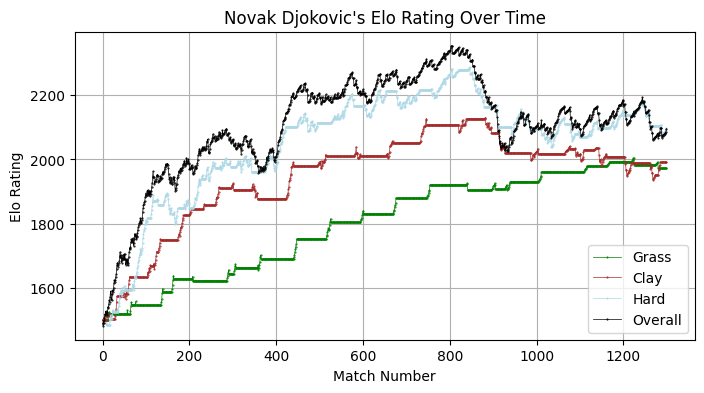

In [19]:
plot_player_elo_graph(104925, "Novak Djokovic")

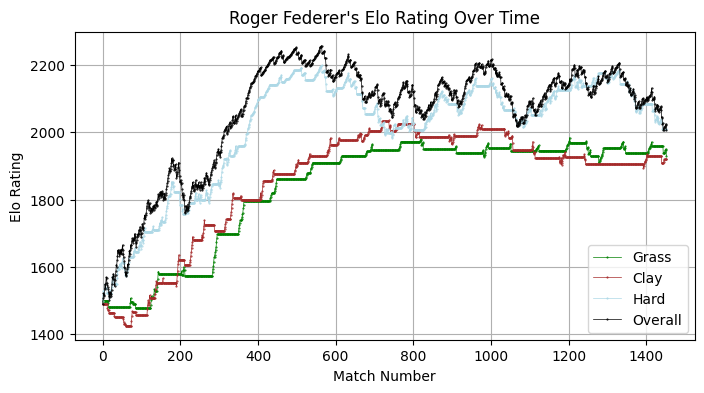

In [20]:
plot_player_elo_graph(103819, "Roger Federer")

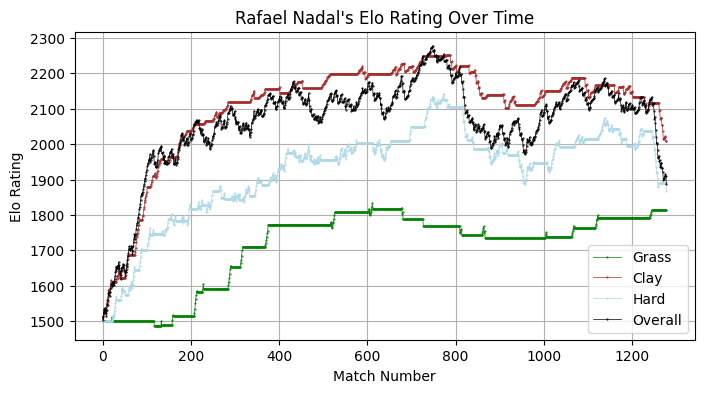

In [21]:
plot_player_elo_graph(104745, "Rafael Nadal")

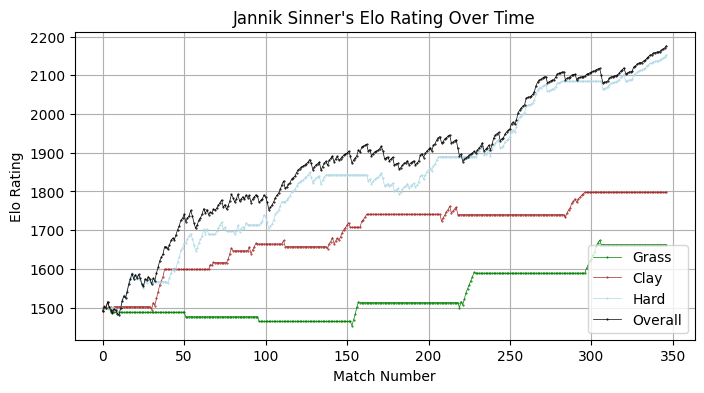

In [22]:
plot_player_elo_graph(206173, "Jannik Sinner")

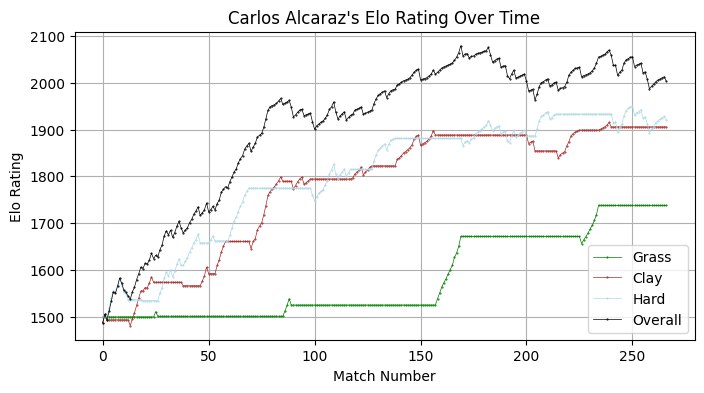

In [23]:
plot_player_elo_graph(207989, "Carlos Alcaraz")

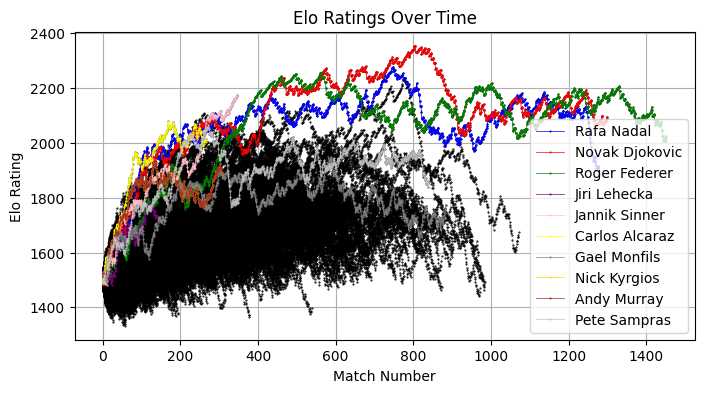

In [24]:
from IPython.display import display
%matplotlib inline
plt.close('all')

nadal = list(all_elo[104745])
novak = list(all_elo[104925])
federer = list(all_elo[103819])
jiri = list(all_elo[208103])
jannik = list(all_elo[206173])
carlos = list(all_elo[207989])
gael = list(all_elo[104792])
nick = list(all_elo[106401])
andy = list(all_elo[104918])
pete = list(all_elo[101736])

# Create a simple line plot
fig = plt.figure(figsize=(8, 4))

for player in all_elo.keys():
    plt.plot(list(all_elo[player]), marker='.', linewidth=0.1, markersize=1, linestyle='-', color='black')

plt.plot(nadal, marker='.', linewidth=0.5, markersize=1, linestyle='-', color='blue', label="Rafa Nadal")
plt.plot(novak, marker='.', linewidth=0.5, markersize=1, linestyle='-', color='red', label="Novak Djokovic")
plt.plot(federer, marker='.', linewidth=0.5, markersize=1, linestyle='-', color='green', label="Roger Federer")
plt.plot(jiri, marker='.', linewidth=0.5, markersize=1, linestyle='-', color='purple', label="Jiri Lehecka")
plt.plot(jannik, marker='.', linewidth=0.5, markersize=1, linestyle='-', color='pink', label="Jannik Sinner")
plt.plot(carlos, marker='.', linewidth=0.5, markersize=1, linestyle='-', color='yellow', label="Carlos Alcaraz")
plt.plot(gael, marker='.', linewidth=0.5, markersize=1, linestyle='-', color='gray', label="Gael Monfils")
plt.plot(nick, marker='.', linewidth=0.5, markersize=1, linestyle='-', color='gold', label="Nick Kyrgios")
plt.plot(nick, marker='.', linewidth=0.5, markersize=1, linestyle='-', color='brown', label="Andy Murray")
plt.plot(pete, marker='.', linewidth=0.5, markersize=1, linestyle='-', color='silver', label="Pete Sampras")

plt.title("Elo Ratings Over Time")
plt.xlabel("Match Number")
plt.ylabel("Elo Rating")

plt.legend(loc="lower right")

plt.grid(True)
plt.savefig("./images/elo_ratings_plot.png", dpi=500)

plt.draw()
plt.show()


### Final tweaks on the dataset

#### Randomize Dataset

In [25]:
final_data["RESULT"] = 1

In [26]:
column_to_randomize = []

for val in list(final_data.columns):
    if "DIFF" in val:
        print(val)
        column_to_randomize.append(val)

column_to_randomize.append("RESULT")
column_to_randomize.append("WINNER_ID")
column_to_randomize.append("LOSER_ID")

final_data[column_to_randomize] = final_data[column_to_randomize].apply(lambda row: row * (-1) if np.random.rand() < 0.5 else row, axis=1)

ATP_POINT_DIFF
ATP_RANK_DIFF
AGE_DIFF
HEIGHT_DIFF
H2H_DIFF
H2H_SURFACE_DIFF
DIFF_N_GAMES
WIN_LAST_3_DIFF
WIN_LAST_5_DIFF
WIN_LAST_10_DIFF
WIN_LAST_25_DIFF
WIN_LAST_50_DIFF
WIN_LAST_100_DIFF
P_ACE_LAST_3_DIFF
P_DF_LAST_3_DIFF
P_1ST_IN_LAST_3_DIFF
P_1ST_WON_LAST_3_DIFF
P_2ND_WON_LAST_3_DIFF
P_BP_SAVED_LAST_3_DIFF
P_ACE_LAST_5_DIFF
P_DF_LAST_5_DIFF
P_1ST_IN_LAST_5_DIFF
P_1ST_WON_LAST_5_DIFF
P_2ND_WON_LAST_5_DIFF
P_BP_SAVED_LAST_5_DIFF
P_ACE_LAST_10_DIFF
P_DF_LAST_10_DIFF
P_1ST_IN_LAST_10_DIFF
P_1ST_WON_LAST_10_DIFF
P_2ND_WON_LAST_10_DIFF
P_BP_SAVED_LAST_10_DIFF
P_ACE_LAST_20_DIFF
P_DF_LAST_20_DIFF
P_1ST_IN_LAST_20_DIFF
P_1ST_WON_LAST_20_DIFF
P_2ND_WON_LAST_20_DIFF
P_BP_SAVED_LAST_20_DIFF
P_ACE_LAST_50_DIFF
P_DF_LAST_50_DIFF
P_1ST_IN_LAST_50_DIFF
P_1ST_WON_LAST_50_DIFF
P_2ND_WON_LAST_50_DIFF
P_BP_SAVED_LAST_50_DIFF
P_ACE_LAST_100_DIFF
P_DF_LAST_100_DIFF
P_1ST_IN_LAST_100_DIFF
P_1ST_WON_LAST_100_DIFF
P_2ND_WON_LAST_100_DIFF
P_BP_SAVED_LAST_100_DIFF
P_ACE_LAST_200_DIFF
P_DF_LAST_200_DIFF
P_1

In [27]:
def fix_ids(row):
    winner, loser = row['WINNER_ID'], row['LOSER_ID']
    if winner < 0 and loser < 0:
        winner, loser = abs(loser), abs(winner)  # Swap and remove negative signs
    return pd.Series([winner, loser])

# Apply transformation
final_data[['WINNER_ID', 'LOSER_ID']] = final_data.apply(fix_ids, axis=1)
final_data.rename(columns={'WINNER_ID': 'PLAYER_1', 'LOSER_ID': 'PLAYER_2'}, inplace=True)

## Plot Datset

In [28]:
final_data

,PLAYER_1,PLAYER_2,ATP_POINT_DIFF,ATP_RANK_DIFF,AGE_DIFF,HEIGHT_DIFF,BEST_OF,DRAW_SIZE,H2H_DIFF,H2H_SURFACE_DIFF,...,ELO_DIFF,ELO_SURFACE_DIFF,ELO_GRAD_5_DIFF,ELO_GRAD_10_DIFF,ELO_GRAD_20_DIFF,ELO_GRAD_35_DIFF,ELO_GRAD_50_DIFF,ELO_GRAD_100_DIFF,ELO_GRAD_250_DIFF,RESULT
0,101746.0,101142.0,-1028.0,69.0,-5.000000,-5.0,3,32,-0.0,-0.0,...,-24.000000,-24.000000,-0.000000,-0.000000,-0.000000,-0.000000,-0.000000,-0.000000,-0.000000,-1.0
1,101613.0,100587.0,257.0,-126.0,-10.300000,-8.0,3,32,0.0,0.0,...,24.000000,24.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.0
2,101179.0,101601.0,352.0,-135.0,3.700000,0.0,3,32,0.0,0.0,...,24.000000,24.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.0
3,101117.0,101332.0,19.0,-7.0,2.000000,7.0,3,32,0.0,0.0,...,24.000000,24.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.0
4,101901.0,101735.0,-734.0,162.0,-0.900000,-11.0,3,32,0.0,0.0,...,24.000000,24.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
111,104925.0,207989.0,-3110.0,4.0,15.953457,5.0,5,128,1.0,2.0,...,93.297142,175.699868,-0.685904,1.530670,3.116970,1.627271,-1.600634,-0.640399,-1.578129,1.0
112,132283.0,210097.0,-1254.0,35.0,7.413415,-2.0,5,128,-0.0,-1.0,...,-148.049490,-154.666406,6.688210,2.921914,-3.477755,-2.555178,-1.863525,-2.386409,-0.000000,-1.0
113,206173.0,200282.0,8295.0,-7.0,-2.493498,8.0,5,128,9.0,8.0,...,303.764362,327.732540,-3.868456,5.110113,4.547991,3.631950,1.387032,0.508457,0.613204,1.0
114,206173.0,210097.0,9550.0,-19.0,1.147844,-2.0,5,128,3.0,2.0,...,390.654026,391.699508,-7.701382,0.587323,0.523377,-0.573950,-0.148565,-0.492939,0.000000,1.0


In [29]:
# sns.pairplot(final_data, hue='RESULT')

![image info](./images/outputAllFeatures.png)

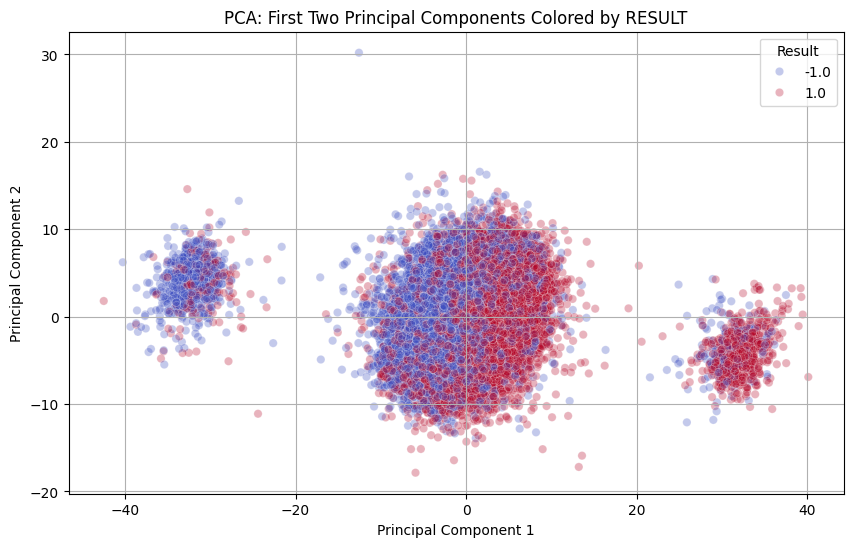

In [30]:
# Drop the target variable ('RESULT') if it exists
features = final_data.drop(columns=['RESULT'], errors='ignore')

# Standardizing the data
scaler = StandardScaler()
features_scaled = scaler.fit_transform(features)

# Applying PCA with 9 principal components
pca_9 = PCA(n_components=9)
principal_components_9 = pca_9.fit_transform(features_scaled)

# Creating a DataFrame with the first 9 principal components
pca_df_9 = pd.DataFrame(principal_components_9, columns=[f'PC{i+1}' for i in range(9)])

# Add the RESULT column back to the PCA DataFrame (if it was originally present in the dataset)
pca_df_9['RESULT'] = final_data['RESULT'].values

# Plot the first two principal components with hue set to RESULT
plt.figure(figsize=(10, 6))
sns.scatterplot(x=pca_df_9['PC1'], y=pca_df_9['PC2'], hue=pca_df_9['RESULT'], palette='coolwarm', alpha=0.3)
plt.xlabel('Principal Component 1')
plt.ylabel('Principal Component 2')
plt.title('PCA: First Two Principal Components Colored by RESULT')
plt.legend(title="Result")
plt.grid(True)
plt.show()


In [31]:
pca_df_9

,PC1,PC2,PC3,PC4,PC5,PC6,PC7,PC8,PC9,RESULT
0,-0.161281,-0.033220,-0.236444,-0.069804,0.345414,-0.025369,0.156906,-0.177732,-0.851555,-1.0
1,0.002785,-0.173527,0.079775,0.374528,0.239184,0.285735,0.392704,-0.262045,-0.839519,1.0
2,0.118868,-0.093624,0.147827,0.132251,-0.307196,-0.012643,-0.114042,-0.032210,-0.908814,1.0
3,0.056102,0.069394,0.107640,-0.048376,-0.112306,0.069838,-0.124816,0.107774,-0.888339,1.0
4,-0.185982,-0.137598,-0.182519,0.009603,0.041881,-0.212014,0.019311,-0.162397,-0.863436,1.0
...,...,...,...,...,...,...,...,...,...,...
95486,0.873578,0.517074,0.379334,0.727849,-2.447775,-1.922914,-2.192467,1.802252,2.970217,1.0
95487,-3.263521,-1.321199,-0.347552,-1.883558,-0.667816,-2.640365,-2.378565,0.233934,3.152229,-1.0
95488,5.503833,-1.531335,5.769897,2.185953,-1.179892,2.955619,1.289036,2.811725,4.199529,1.0
95489,0.053416,-1.136865,5.458733,2.134606,-3.790496,0.352582,0.786134,0.095628,3.718356,1.0


In [32]:
# sns.pairplot(data=pca_df_9, hue="RESULT")

![image info](./images/outputPCA_Pariplot2.png)

In [33]:
if 'ELO_DIFF' in final_data.columns:
    pca_df_9['ELO_DIFF'] = final_data['ELO_DIFF'].values

if 'DIFF_N_GAMES' in final_data.columns:
    pca_df_9['DIFF_N_GAMES'] = final_data['DIFF_N_GAMES'].values

if 'H2H_DIFF' in final_data.columns:
    pca_df_9['H2H_DIFF'] = final_data['H2H_DIFF'].values

if 'P_1ST_WON_LAST_50_DIFF' in final_data.columns:
    pca_df_9['P_1ST_WON_LAST_50_DIFF'] = final_data['P_1ST_WON_LAST_50_DIFF'].values


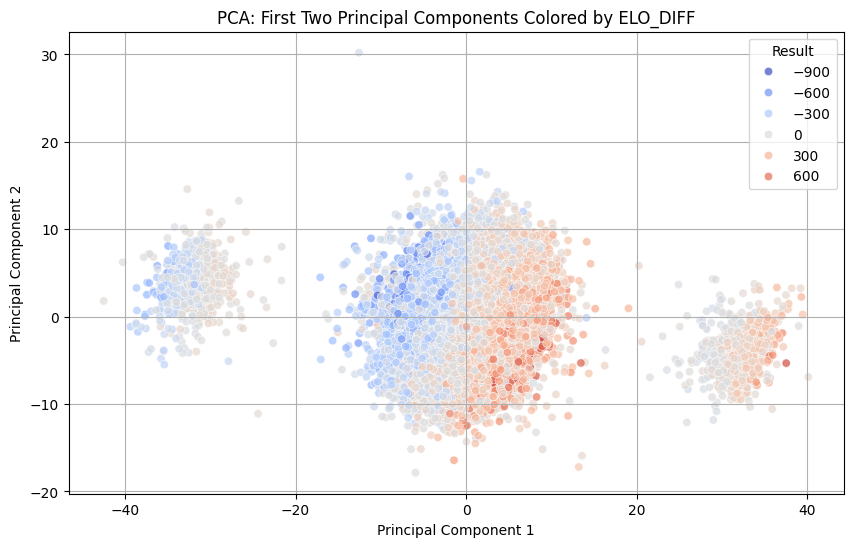

In [34]:
# P_1ST_WON_LAST_50_DIFF
plt.figure(figsize=(10, 6))
sns.scatterplot(x=pca_df_9['PC1'], y=pca_df_9['PC2'], hue=pca_df_9['ELO_DIFF'], palette='coolwarm', alpha=0.7)
plt.xlabel('Principal Component 1')
plt.ylabel('Principal Component 2')
plt.title('PCA: First Two Principal Components Colored by ELO_DIFF')
plt.legend(title="Result")
plt.grid(True)
plt.show()

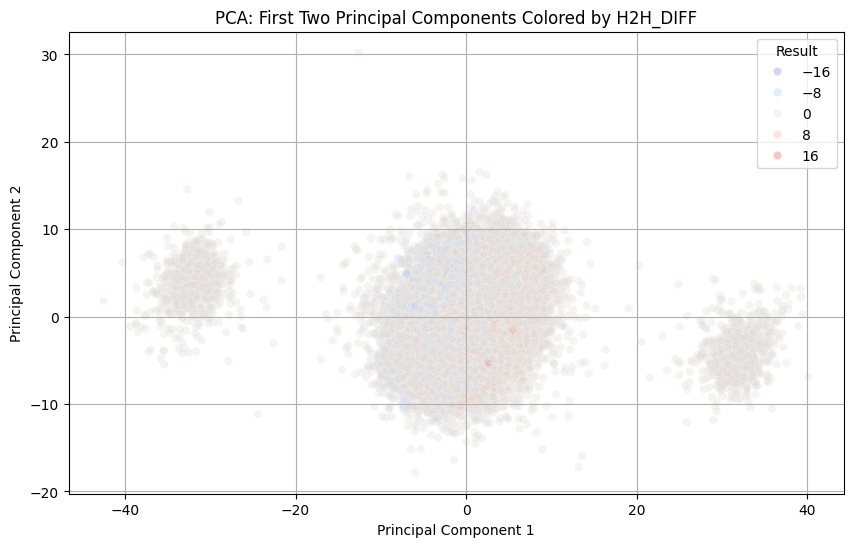

In [35]:
# P_1ST_WON_LAST_50_DIFF
plt.figure(figsize=(10, 6))
sns.scatterplot(x=pca_df_9['PC1'], y=pca_df_9['PC2'], hue=pca_df_9['H2H_DIFF'], palette='coolwarm', alpha=0.3)
plt.xlabel('Principal Component 1')
plt.ylabel('Principal Component 2')
plt.title('PCA: First Two Principal Components Colored by H2H_DIFF')
plt.legend(title="Result")
plt.grid(True)
plt.show()

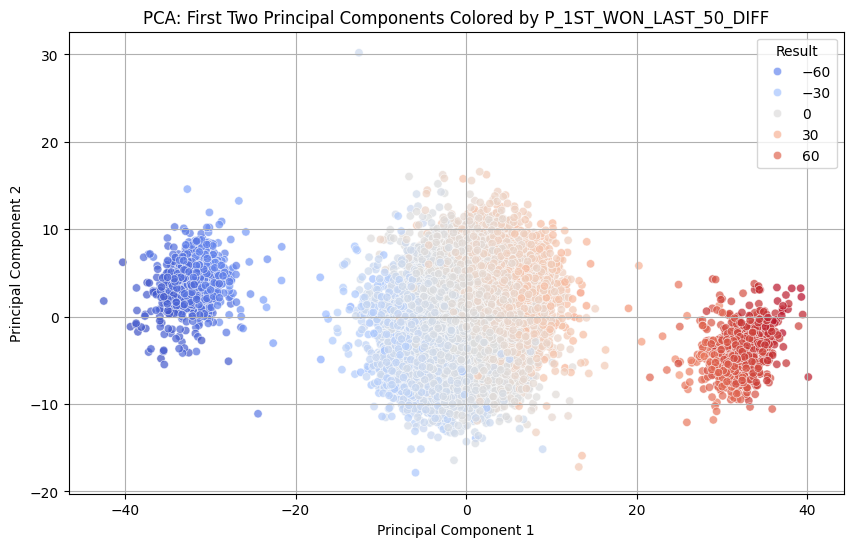

In [36]:
# P_1ST_WON_LAST_50_DIFF
plt.figure(figsize=(10, 6))
sns.scatterplot(x=pca_df_9['PC1'], y=pca_df_9['PC2'], hue=pca_df_9['P_1ST_WON_LAST_50_DIFF'], palette='coolwarm', alpha=0.7)
plt.xlabel('Principal Component 1')
plt.ylabel('Principal Component 2')
plt.title('PCA: First Two Principal Components Colored by P_1ST_WON_LAST_50_DIFF')
plt.legend(title="Result")
plt.grid(True)
plt.show()

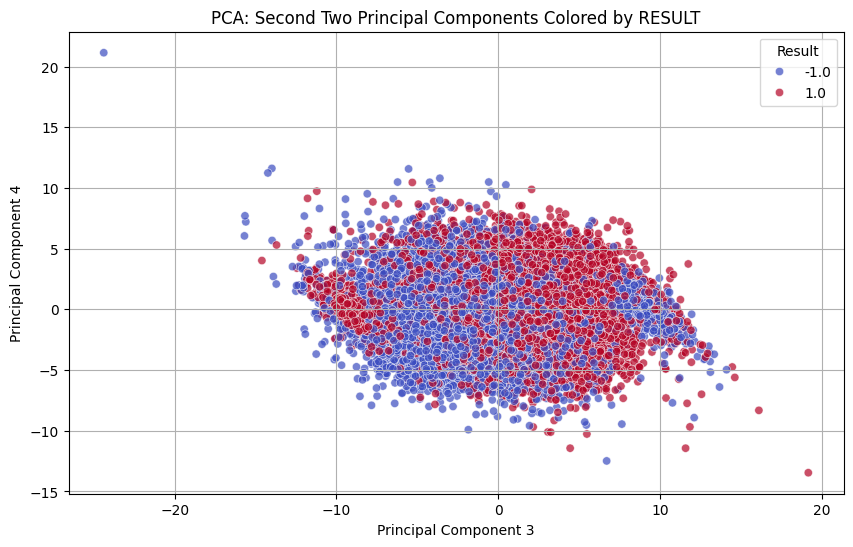

In [37]:
# Plot the first two principal components with hue set to RESULT
plt.figure(figsize=(10, 6))
sns.scatterplot(x=pca_df_9['PC3'], y=pca_df_9['PC4'], hue=pca_df_9['RESULT'], palette='coolwarm', alpha=0.7)
plt.xlabel('Principal Component 3')
plt.ylabel('Principal Component 4')
plt.title('PCA: Second Two Principal Components Colored by RESULT')
plt.legend(title="Result")
plt.grid(True)
plt.show()


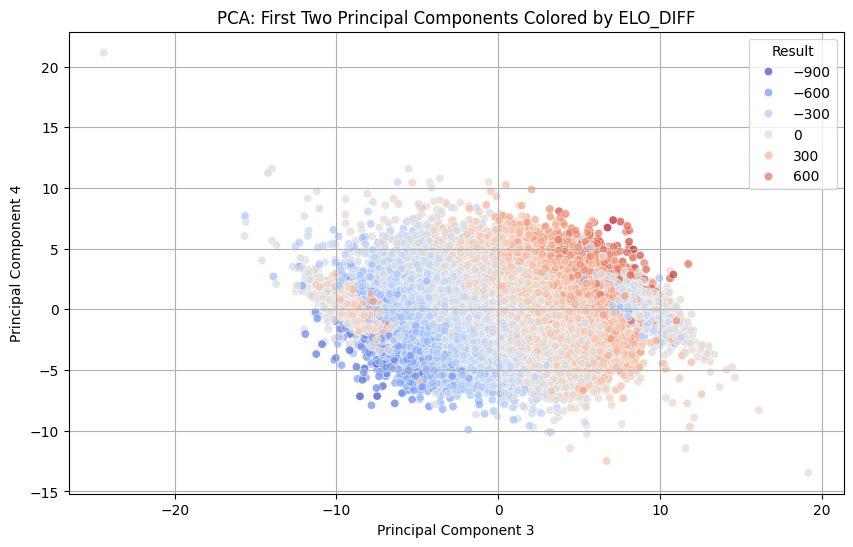

In [38]:
# Plot the first two principal components with hue set to RESULT
plt.figure(figsize=(10, 6))
sns.scatterplot(x=pca_df_9['PC3'], y=pca_df_9['PC4'], hue=pca_df_9['ELO_DIFF'], palette='coolwarm', alpha=0.7)
plt.xlabel('Principal Component 3')
plt.ylabel('Principal Component 4')
plt.title('PCA: First Two Principal Components Colored by ELO_DIFF')
plt.legend(title="Result")
plt.grid(True)
plt.show()


In [39]:
# Get PCA loadings (how much each original feature contributes to each principal component)
loadings = pd.DataFrame(pca_9.components_.T, 
                        columns=[f'PC{i+1}' for i in range(9)], 
                        index=features.columns)

# Display absolute contributions of features to PC1 & PC2
print("Feature importance in PC1 and PC2:")
print(loadings[['PC1', 'PC2', 'PC3', 'PC4']].abs().sort_values(by='PC1', ascending=False))


Feature importance in PC1 and PC2:
                               PC1       PC2       PC3       PC4
P_1ST_WON_LAST_100_DIFF   0.179560  0.055036  0.016510  0.019560
P_1ST_WON_LAST_50_DIFF    0.179378  0.055099  0.013051  0.013592
P_1ST_WON_LAST_200_DIFF   0.179209  0.055071  0.020865  0.023299
P_1ST_WON_LAST_300_DIFF   0.178958  0.055005  0.023806  0.024623
P_1ST_WON_LAST_2000_DIFF  0.178495  0.056329  0.029031  0.027132
...                            ...       ...       ...       ...
ELO_GRAD_100_DIFF         0.006077  0.005721  0.033133  0.070080
ELO_GRAD_250_DIFF         0.005340  0.002364  0.025578  0.028078
ELO_GRAD_5_DIFF           0.004847  0.011249  0.030775  0.103185
BEST_OF                   0.001031  0.000756  0.000293  0.001860
DRAW_SIZE                 0.000400  0.000026  0.000417  0.000545

[80 rows x 4 columns]


## Final Dataset

In [40]:
final_data.iloc[80000:90000]

,PLAYER_1,PLAYER_2,ATP_POINT_DIFF,ATP_RANK_DIFF,AGE_DIFF,HEIGHT_DIFF,BEST_OF,DRAW_SIZE,H2H_DIFF,H2H_SURFACE_DIFF,...,ELO_DIFF,ELO_SURFACE_DIFF,ELO_GRAD_5_DIFF,ELO_GRAD_10_DIFF,ELO_GRAD_20_DIFF,ELO_GRAD_35_DIFF,ELO_GRAD_50_DIFF,ELO_GRAD_100_DIFF,ELO_GRAD_250_DIFF,RESULT
80000,106432.0,105051.0,841.0,-32.0,-9.0,0.0,3,64,0.0,0.0,...,196.379676,196.931634,-6.683133,-6.000999,-3.123984,-2.824546,-1.229468,1.160180,0.000000,1.0
80001,105453.0,103819.0,-4170.0,10.0,-8.4,-7.0,3,64,-3.0,-3.0,...,-230.922669,-266.413618,2.879421,2.598731,3.926027,2.081096,1.260959,-1.479487,-0.705876,-1.0
80002,100644.0,104925.0,-1690.0,2.0,-9.9,10.0,3,64,1.0,-0.0,...,-214.221116,-317.155199,-3.054860,-7.272872,-6.182346,-3.970402,-0.090597,2.478836,2.939864,-1.0
80003,103819.0,106432.0,5085.0,-17.0,15.3,-3.0,3,64,1.0,2.0,...,270.614246,344.586151,-12.087150,-3.497060,-2.608551,-3.444139,-3.705298,-1.655372,-0.000000,-1.0
80004,106432.0,104925.0,-4630.0,16.0,-9.5,-0.0,3,64,-2.0,-0.0,...,-293.841865,-378.835340,9.025187,-0.885753,-3.106526,-1.439039,1.259594,4.193783,-0.000000,-1.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
89995,105173.0,200670.0,-205.0,20.0,10.5,-3.0,3,32,-1.0,-1.0,...,-2.664414,4.030663,-5.234898,-4.628573,-6.673456,-3.413101,0.000000,0.000000,0.000000,1.0
89996,133430.0,111581.0,961.0,-60.0,-1.2,-3.0,3,32,-0.0,-0.0,...,228.252755,223.960104,-2.653522,2.261749,5.459600,3.475979,-0.000000,-0.000000,-0.000000,-1.0
89997,106415.0,111456.0,437.0,-22.0,-0.5,-8.0,3,32,3.0,1.0,...,35.547257,31.073773,4.876587,3.467339,-0.187827,3.574513,3.834164,-0.650262,-0.000000,-1.0
89998,106218.0,123896.0,772.0,-729.0,-4.1,-5.0,3,32,0.0,0.0,...,147.006529,129.772377,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.0


In [41]:
# final_data.to_csv("./data/final_dataset.csv", index=False)

In [42]:
# REMOVE FEATURES???

# for feature in final_data.keys()[2:]:
#     if feature not in ['WIN_LAST_10_DIFF','WIN_LAST_25_DIFF','P_1ST_WON_LAST_100_DIFF','P_2ND_WON_LAST_100_DIFF','P_BP_SAVED_LAST_100_DIFF','ELO_DIFF','ELO_SURFACE_DIFF','RESULT']:
#         final_data = final_data.drop(feature, axis=1)


### Split training vs testing data

In [43]:
data_np = final_data.to_numpy(dtype=object)[:95375, 2:]
np.random.shuffle(data_np)
data_np

array([[251.0, -33.0, -14.799999999999997, ..., 0.0, 0.0, 1.0],
       [-1097.0, 9.0, 9.0, ..., -0.0, -0.0, -1.0],
       [355.0, -132.0, -12.7, ..., -0.0, -0.0, -1.0],
       ...,
       [-299.0, 41.0, 1.6999999999999993, ..., -0.0, -0.0, -1.0],
       [291.0, -35.0, -7.699999999999999, ..., -0.0, -0.0, -1.0],
       [458.0, -96.0, -2.799999999999997, ..., 0.0, 0.0, 1.0]],
      dtype=object)

In [44]:
split = 0.80
total_rows = final_data.shape[0]
value = round(split*total_rows)

data_np_train = data_np[:value,:]
data_np_test = data_np[value:,:]

In [45]:
mapper = np.vectorize(lambda x: "Player 2 Wins" if x == -1 else "Player 1 Wins")
reverse_mapper = np.vectorize(lambda x: 0 if x == "Player 2 Wins" else 1)
x_train = data_np_train[:,:-1]
x_test = data_np_test[:,:-1]
y_pred_train = mapper(data_np_train[:,-1:])
y_pred_test = mapper(data_np_test[:,-1:])

In [46]:
x_test.shape

(18982, 78)

In [47]:
from sklearn.metrics import accuracy_score
# Note that for some of the features are switched (like ATP_RANK_DIFF, where more positive is better)
total_features = final_data.keys()[2:]

for i in range(data_np_test.shape[1]):
    elo_pred = []

    for row in data_np_test[:,i:i+1]:
        if row[0] > 0:
            elo_pred.append("Player 1 Wins")
        else:
            elo_pred.append("Player 2 Wins")

    print(total_features[i]+": "+str(accuracy_score(y_pred_test, elo_pred)))
    


ATP_POINT_DIFF: 0.6516700031608893
ATP_RANK_DIFF: 0.34843535981456114
AGE_DIFF: 0.487409124433674
HEIGHT_DIFF: 0.5227057212095669
BEST_OF: 0.4997365925613739
DRAW_SIZE: 0.4997365925613739
H2H_DIFF: 0.5452007164682331
H2H_SURFACE_DIFF: 0.5329259298282584
DIFF_N_GAMES: 0.6074702349594353
WIN_LAST_3_DIFF: 0.5487303761458223
WIN_LAST_5_DIFF: 0.5832894320935623
WIN_LAST_10_DIFF: 0.6091033610789168
WIN_LAST_25_DIFF: 0.629859867242651
WIN_LAST_50_DIFF: 0.6382362237909599
WIN_LAST_100_DIFF: 0.6440838689284586
P_ACE_LAST_3_DIFF: 0.5504161837530291
P_DF_LAST_3_DIFF: 0.48329996839110734
P_1ST_IN_LAST_3_DIFF: 0.5207038246760088
P_1ST_WON_LAST_3_DIFF: 0.5655884522178907
P_2ND_WON_LAST_3_DIFF: 0.5551575176482983
P_BP_SAVED_LAST_3_DIFF: 0.5289221367611421
P_ACE_LAST_5_DIFF: 0.5541565693815194
P_DF_LAST_5_DIFF: 0.47850595300811294
P_1ST_IN_LAST_5_DIFF: 0.5251290696449268
P_1ST_WON_LAST_5_DIFF: 0.5739648087661996
P_2ND_WON_LAST_5_DIFF: 0.5709092824781372
P_BP_SAVED_LAST_5_DIFF: 0.5386155305025814
P_ACE

In [48]:
final_data.keys()

Index(['PLAYER_1', 'PLAYER_2', 'ATP_POINT_DIFF', 'ATP_RANK_DIFF', 'AGE_DIFF',
       'HEIGHT_DIFF', 'BEST_OF', 'DRAW_SIZE', 'H2H_DIFF', 'H2H_SURFACE_DIFF',
       'DIFF_N_GAMES', 'WIN_LAST_3_DIFF', 'WIN_LAST_5_DIFF',
       'WIN_LAST_10_DIFF', 'WIN_LAST_25_DIFF', 'WIN_LAST_50_DIFF',
       'WIN_LAST_100_DIFF', 'P_ACE_LAST_3_DIFF', 'P_DF_LAST_3_DIFF',
       'P_1ST_IN_LAST_3_DIFF', 'P_1ST_WON_LAST_3_DIFF',
       'P_2ND_WON_LAST_3_DIFF', 'P_BP_SAVED_LAST_3_DIFF', 'P_ACE_LAST_5_DIFF',
       'P_DF_LAST_5_DIFF', 'P_1ST_IN_LAST_5_DIFF', 'P_1ST_WON_LAST_5_DIFF',
       'P_2ND_WON_LAST_5_DIFF', 'P_BP_SAVED_LAST_5_DIFF', 'P_ACE_LAST_10_DIFF',
       'P_DF_LAST_10_DIFF', 'P_1ST_IN_LAST_10_DIFF', 'P_1ST_WON_LAST_10_DIFF',
       'P_2ND_WON_LAST_10_DIFF', 'P_BP_SAVED_LAST_10_DIFF',
       'P_ACE_LAST_20_DIFF', 'P_DF_LAST_20_DIFF', 'P_1ST_IN_LAST_20_DIFF',
       'P_1ST_WON_LAST_20_DIFF', 'P_2ND_WON_LAST_20_DIFF',
       'P_BP_SAVED_LAST_20_DIFF', 'P_ACE_LAST_50_DIFF', 'P_DF_LAST_50_DIFF',
      

# Train Dataset

In [49]:
from DecisionTree import DecisionTree
import pandas as pd
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import train_test_split
from sklearn import metrics
from sklearn.tree import plot_tree

### Decision Tree with Sklearn

In [50]:
# Instantiate a Decision Tree
decision_sklearn = DecisionTreeClassifier()
decision_sklearn = decision_sklearn.fit(data_np_train[:,:-1], y_pred_train)

# Make predictions and test accuracy
predictions_test = decision_sklearn.predict(data_np_test[:,:-1])
predictions_train = decision_sklearn.predict(data_np_train[:,:-1])
print("Train Accuracy: "+str(accuracy_score(y_pred_train, predictions_train)))
print("Test Accuracy: "+str(accuracy_score(y_pred_test, predictions_test)))

Train Accuracy: 1.0
Test Accuracy: 0.7339584869876725


### Random Forest with Sklearn

In [51]:
# Instantiate a RandomForest
forest_sklearn = RandomForestClassifier(n_estimators=200, max_depth=30, min_samples_split=10, max_features="log2", bootstrap=True)
forest_sklearn = forest_sklearn.fit(x_train, y_pred_train)

# Make predictions and test accuracy
predictions_train = forest_sklearn.predict(x_train)
predictions_test = forest_sklearn.predict(x_test)
print("Train Accuracy: "+str(accuracy_score(y_pred_train, predictions_train)))
print("Test Accuracy: "+str(accuracy_score(y_pred_test, predictions_test)))

/opt/homebrew/anaconda3/envs/neuralNets/lib/python3.12/site-packages/sklearn/base.py:1389: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return fit_method(estimator, *args, **kwargs)


Train Accuracy: 0.991674629874465
Test Accuracy: 0.7836898114002739


In [52]:
forest_sklearn.feature_importances_

array([0.02954265, 0.02790538, 0.01420605, 0.00658114, 0.00103219,
       0.00367519, 0.00402664, 0.00293297, 0.01928221, 0.00273854,
       0.00446236, 0.00923426, 0.01855728, 0.02761205, 0.02972913,
       0.00879014, 0.00912322, 0.00903594, 0.00997253, 0.00966078,
       0.00962082, 0.00843325, 0.00870584, 0.00854634, 0.00973731,
       0.00973165, 0.00939302, 0.00818829, 0.00877578, 0.00807373,
       0.00973275, 0.01011033, 0.00908082, 0.00794366, 0.00823478,
       0.00818152, 0.00995017, 0.01207544, 0.00911662, 0.00753418,
       0.00782157, 0.00788622, 0.01008388, 0.01257807, 0.00888317,
       0.00739061, 0.00771094, 0.00768941, 0.00912752, 0.01437015,
       0.00956332, 0.00725203, 0.00770794, 0.0074795 , 0.00866532,
       0.01414024, 0.0091289 , 0.00716956, 0.00755605, 0.00747089,
       0.00789366, 0.01131413, 0.0093549 , 0.00719807, 0.00789319,
       0.00750983, 0.00817574, 0.01250275, 0.00886617, 0.12648043,
       0.12595247, 0.00993072, 0.0098482 , 0.00996225, 0.00939

Okay, this is actually really overfitted (did not realize it was this much haha). Let's try some other parameters to see what happens

In [53]:
# Instantiate a RandomForest
forest_sklearn = RandomForestClassifier(n_estimators=200, max_depth=10, min_samples_split=20, min_samples_leaf=15, max_features="log2", bootstrap=True)
forest_sklearn = forest_sklearn.fit(data_np_train[:,:-1], y_pred_train)

# Make predictions and test accuracy
predictions_test = forest_sklearn.predict(data_np_test[:,:-1])
predictions_train = forest_sklearn.predict(data_np_train[:,:-1])
print("Train Accuracy: "+str(accuracy_score(y_pred_train, predictions_train)))
print("Test Accuracy: "+str(accuracy_score(y_pred_test, predictions_test)))

/opt/homebrew/anaconda3/envs/neuralNets/lib/python3.12/site-packages/sklearn/base.py:1389: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return fit_method(estimator, *args, **kwargs)


Train Accuracy: 0.7824800701634966
Test Accuracy: 0.7655146981350753


### XGBoost with Sklearn

In [54]:
from xgboost import XGBClassifier
from sklearn.metrics import accuracy_score

# Instantiate an XGBoost Classifier
xgb_model = XGBClassifier(n_estimators=200, max_depth=10, learning_rate=0.1, subsample=0.8, colsample_bytree=0.7)

# Train the model
xgb_model.fit(data_np_train[:, :-1], reverse_mapper(y_pred_train))

# Make predictions
predictions_test = xgb_model.predict(data_np_test[:, :-1])
predictions_train = xgb_model.predict(data_np_train[:, :-1])

# Calculate accuracy
print("Train Accuracy: " + str(accuracy_score(reverse_mapper(y_pred_train), predictions_train)))
print("Test Accuracy: " + str(accuracy_score(reverse_mapper(y_pred_test), predictions_test)))


Train Accuracy: 0.9970547039650229
Test Accuracy: 0.847171004109156


In [55]:
xgb_model.feature_importances_

array([0.02151048, 0.01378469, 0.01099829, 0.00893828, 0.01642324,
       0.00903201, 0.00927581, 0.01099932, 0.02373292, 0.0129255 ,
       0.01365486, 0.01946066, 0.02655996, 0.03886126, 0.02924789,
       0.00861093, 0.00870194, 0.0086434 , 0.00904835, 0.00820987,
       0.00836581, 0.00871659, 0.00878629, 0.00877384, 0.00900751,
       0.00854671, 0.00820954, 0.00879898, 0.00897025, 0.00864105,
       0.00849307, 0.00885131, 0.00851742, 0.00912593, 0.00841341,
       0.00860727, 0.00951753, 0.00906678, 0.00905718, 0.00924429,
       0.00836469, 0.00930422, 0.00914544, 0.00883582, 0.0082899 ,
       0.00882201, 0.0086169 , 0.00866655, 0.00918049, 0.00973202,
       0.00949872, 0.00909625, 0.00948349, 0.00859071, 0.00964996,
       0.01010392, 0.00901702, 0.00902043, 0.00840597, 0.00940999,
       0.00956323, 0.00950326, 0.00964932, 0.00904639, 0.00933762,
       0.00885087, 0.00917748, 0.00977592, 0.00949211, 0.05535229,
       0.09847571, 0.0101559 , 0.01135328, 0.01529782, 0.01566

### Basic Neural Net with Tensorflow

In [56]:
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras import layers
from sklearn.preprocessing import StandardScaler

# Normalize the data
scaler = StandardScaler()
X_train = scaler.fit_transform(data_np_train[:, :-1])
X_test = scaler.transform(data_np_test[:, :-1])

# Define the neural network
model = keras.Sequential([
    layers.Dense(64, activation='relu', input_shape=(X_train.shape[1],)),  # First hidden layer
    layers.Dense(32, activation='relu'),  # Second hidden layer
    layers.Dense(16, activation='relu'),  # Third hidden layer
    layers.Dense(1, activation='sigmoid')  # Output layer (for binary classification)
])

# Compile the model
model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])

# Train the model
model.fit(X_train, reverse_mapper(y_pred_train), epochs=50, batch_size=32, validation_split=0.2, verbose=1)

# Evaluate on test set
train_loss, train_acc = model.evaluate(X_train, reverse_mapper(y_pred_train), verbose=0)
test_loss, test_acc = model.evaluate(X_test, reverse_mapper(y_pred_test), verbose=0)

print(f"Train Accuracy: {train_acc}")
print(f"Test Accuracy: {test_acc}")


Epoch 1/50


/opt/homebrew/anaconda3/envs/neuralNets/lib/python3.12/site-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


1910/1910 ━━━━━━━━━━━━━━━━━━━━ 2s 811us/step - accuracy: 0.7233 - loss: 0.5464 - val_accuracy: 0.7927 - val_loss: 0.4543
Epoch 2/50
1910/1910 ━━━━━━━━━━━━━━━━━━━━ 1s 670us/step - accuracy: 0.7980 - loss: 0.4418 - val_accuracy: 0.8089 - val_loss: 0.4306
Epoch 3/50
1910/1910 ━━━━━━━━━━━━━━━━━━━━ 2s 814us/step - accuracy: 0.8162 - loss: 0.4069 - val_accuracy: 0.8225 - val_loss: 0.3993
Epoch 4/50
1910/1910 ━━━━━━━━━━━━━━━━━━━━ 1s 674us/step - accuracy: 0.8257 - loss: 0.3903 - val_accuracy: 0.8192 - val_loss: 0.4102
Epoch 5/50
1910/1910 ━━━━━━━━━━━━━━━━━━━━ 1s 732us/step - accuracy: 0.8317 - loss: 0.3839 - val_accuracy: 0.8235 - val_loss: 0.3971
Epoch 6/50
1910/1910 ━━━━━━━━━━━━━━━━━━━━ 1s 612us/step - accuracy: 0.8386 - loss: 0.3718 - val_accuracy: 0.8300 - val_loss: 0.3875
Epoch 7/50
1910/1910 ━━━━━━━━━━━━━━━━━━━━ 1s 681us/step - accuracy: 0.8385 - loss: 0.3704 - val_accuracy: 0.8362 - val_loss: 0.3797
Epoch 8/50
1910/1910 ━━━━━━━━━━━━━━━━━━━━ 1s 709us/step - accuracy: 0.8430 - loss: 0.36

## GridSearch CV

Trying GridSearchCV to see what happens

In [57]:
# from xgboost import XGBClassifier
# from sklearn.model_selection import GridSearchCV
# from sklearn.metrics import accuracy_score

# # Define parameter grid
# param_grid = {
#     'n_estimators': [100, 200, 300],
#     'max_depth': [6, 10, 15],
#     'learning_rate': [0.01, 0.1, 0.2],
#     'subsample': [0.6, 0.8, 1.0],
#     'colsample_bytree': [0.6, 0.7, 0.8]
# }

# # Instantiate an XGBoost Classifier
# xgb_model = XGBClassifier()

# # Perform GridSearchCV
# grid_search = GridSearchCV(estimator=xgb_model, param_grid=param_grid, scoring='accuracy', cv=5, verbose=3, n_jobs=-1)
# grid_search.fit(data_np_train[:, :-1], reverse_mapper(y_pred_train))

# # Best parameters
# print("Best Parameters:", grid_search.best_params_)

# # Train the best model
# best_xgb_model = grid_search.best_estimator_

# # Make predictions
# predictions_test = best_xgb_model.predict(data_np_test[:, :-1])
# predictions_train = best_xgb_model.predict(data_np_train[:, :-1])

# # Calculate accuracy
# print("Train Accuracy:", accuracy_score(reverse_mapper(y_pred_train), predictions_train))
# print("Test Accuracy:", accuracy_score(reverse_mapper(y_pred_test), predictions_test))


In [58]:
# from sklearn.model_selection import GridSearchCV

# param_grid = {
#     'n_estimators': [100, 200, 300],
#     'max_depth': [10, 15, 20, None],
#     'min_samples_split': [2, 5, 10],
#     'min_samples_leaf': [1, 2, 5],
#     'max_features': ['sqrt', 'log2']
# }

# grid_search = GridSearchCV(
#     estimator=RandomForestClassifier(),
#     param_grid=param_grid,
#     cv=5,  # 5-fold cross-validation
#     n_jobs=-1,
#     verbose=4
# )
# grid_search.fit(data_np_train[:,:-1], y_pred_train.squeeze())

# print("Best params:", grid_search.best_params_)
# print("Best cross-validation score:", grid_search.best_score_)


## Predict Australian Open 2025

In [77]:
# Australian Open Data
aus_data_np = final_data.to_numpy(dtype=object)[95375:, 2:]
full_aus_data_np = final_data.iloc[95375:, :]

x_test_aus = aus_data_np[:,:-1]
y_pred_test_aus = mapper(aus_data_np[:,-1:])

In [78]:
# Make predictions
predictions_test = xgb_model.predict(aus_data_np[:, :-1])

# Calculate accuracy
print("Accuracy: " + str(accuracy_score(reverse_mapper(y_pred_test_aus), predictions_test)))


Accuracy: 0.8448275862068966


In [79]:
full_aus_data_np["PREDICTION"] = list(predictions_test)
full_aus_data_np

/var/folders/2n/3gvc3mg10j76nnrf7fqlxh640000gn/T/ipykernel_34517/4142515727.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  full_aus_data_np["PREDICTION"] = list(predictions_test)


,PLAYER_1,PLAYER_2,ATP_POINT_DIFF,ATP_RANK_DIFF,AGE_DIFF,HEIGHT_DIFF,BEST_OF,DRAW_SIZE,H2H_DIFF,H2H_SURFACE_DIFF,...,ELO_SURFACE_DIFF,ELO_GRAD_5_DIFF,ELO_GRAD_10_DIFF,ELO_GRAD_20_DIFF,ELO_GRAD_35_DIFF,ELO_GRAD_50_DIFF,ELO_GRAD_100_DIFF,ELO_GRAD_250_DIFF,RESULT,PREDICTION
0,200384.0,117357.0,380.0,-98.0,-3.358658,-10.0,5,128,0.0,0.0,...,10.925591,3.063590,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.0,0
1,202261.0,209950.0,-1653.0,72.0,2.975359,8.0,5,128,-0.0,-0.0,...,-155.026079,2.852961,3.474051,0.537350,-0.000000,-0.000000,-0.000000,-0.000000,-1.0,0
2,105453.0,106329.0,177.0,-29.0,4.419576,-5.0,5,128,1.0,0.0,...,256.399637,-0.304419,5.883251,-0.508699,-4.910880,-3.631358,-2.345935,0.000000,1.0,1
3,134770.0,144719.0,3288.0,-56.0,-1.632444,0.0,5,128,1.0,-1.0,...,295.777864,10.940112,3.431242,-4.447359,-3.640182,-1.390806,0.746440,0.000000,1.0,1
4,200273.0,207352.0,-520.0,152.0,3.413415,3.0,5,128,0.0,0.0,...,-7.677801,-6.751198,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
111,104925.0,207989.0,-3110.0,4.0,15.953457,5.0,5,128,1.0,2.0,...,175.699868,-0.685904,1.530670,3.116970,1.627271,-1.600634,-0.640399,-1.578129,1.0,1
112,132283.0,210097.0,-1254.0,35.0,7.413415,-2.0,5,128,-0.0,-1.0,...,-154.666406,6.688210,2.921914,-3.477755,-2.555178,-1.863525,-2.386409,-0.000000,-1.0,0
113,206173.0,200282.0,8295.0,-7.0,-2.493498,8.0,5,128,9.0,8.0,...,327.732540,-3.868456,5.110113,4.547991,3.631950,1.387032,0.508457,0.613204,1.0,1
114,206173.0,210097.0,9550.0,-19.0,1.147844,-2.0,5,128,3.0,2.0,...,391.699508,-7.701382,0.587323,0.523377,-0.573950,-0.148565,-0.492939,0.000000,1.0,1


In [80]:
# Jannik Sinner's Run in the Australian Open
full_aus_data_np[(full_aus_data_np["PLAYER_1"] == 206173.0) | (full_aus_data_np["PLAYER_2"] == 206173.0)]

,PLAYER_1,PLAYER_2,ATP_POINT_DIFF,ATP_RANK_DIFF,AGE_DIFF,HEIGHT_DIFF,BEST_OF,DRAW_SIZE,H2H_DIFF,H2H_SURFACE_DIFF,...,ELO_SURFACE_DIFF,ELO_GRAD_5_DIFF,ELO_GRAD_10_DIFF,ELO_GRAD_20_DIFF,ELO_GRAD_35_DIFF,ELO_GRAD_50_DIFF,ELO_GRAD_100_DIFF,ELO_GRAD_250_DIFF,RESULT,PREDICTION
19,111797.0,206173.0,-10490.0,35.0,5.846680,10.0,5,128,-0.0,-1.0,...,-594.774632,-2.203022,-5.831031,-9.636600,-5.826191,-3.962613,-1.207378,-0.000000,-1.0,0
87,206173.0,209262.0,11494.0,-172.0,-0.468857,8.0,5,128,0.0,0.0,...,640.634542,0.161412,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.0,1
102,206173.0,106218.0,10655.0,-45.0,-8.062971,11.0,5,128,1.0,1.0,...,495.993372,-6.035106,-3.432547,1.646445,0.700858,0.711423,1.424131,0.000000,1.0,1
107,208029.0,206173.0,-8920.0,12.0,-1.701574,-3.0,5,128,-0.0,-0.0,...,-351.037221,6.478860,3.649514,0.957133,-0.868704,-0.632101,-2.253651,-0.000000,-1.0,0
113,206173.0,200282.0,8295.0,-7.0,-2.493498,8.0,5,128,9.0,8.0,...,327.732540,-3.868456,5.110113,4.547991,3.631950,1.387032,0.508457,0.613204,1.0,1
114,206173.0,210097.0,9550.0,-19.0,1.147844,-2.0,5,128,3.0,2.0,...,391.699508,-7.701382,0.587323,0.523377,-0.573950,-0.148565,-0.492939,0.000000,1.0,1
115,206173.0,100644.0,4195.0,-1.0,-4.323066,-7.0,5,128,-2.0,-2.0,...,241.229146,-1.616586,-2.362125,-1.025873,1.710844,1.281236,1.050292,1.696856,1.0,1


In [81]:
# Carlos Alcaraz's Run in the Australian Open
full_aus_data_np[(full_aus_data_np["PLAYER_1"] == 207989.0) | (full_aus_data_np["PLAYER_2"] == 207989.0)]

,PLAYER_1,PLAYER_2,ATP_POINT_DIFF,ATP_RANK_DIFF,AGE_DIFF,HEIGHT_DIFF,BEST_OF,DRAW_SIZE,H2H_DIFF,H2H_SURFACE_DIFF,...,ELO_SURFACE_DIFF,ELO_GRAD_5_DIFF,ELO_GRAD_10_DIFF,ELO_GRAD_20_DIFF,ELO_GRAD_35_DIFF,ELO_GRAD_50_DIFF,ELO_GRAD_100_DIFF,ELO_GRAD_250_DIFF,RESULT,PREDICTION
30,207989.0,207686.0,6267.0,-74.0,-2.430527,-2.0,5,128,1.0,0.0,...,355.122841,1.788814,-8.100473,-1.128221,0.027051,0.585336,0.000000,0.000000,1.0,1
60,106415.0,207989.0,-6203.0,62.0,7.603012,-13.0,5,128,-1.0,-1.0,...,-310.369640,-1.114747,3.546325,3.352702,1.463882,-0.341689,0.074440,-1.404581,-1.0,0
90,132686.0,207989.0,-5565.0,30.0,6.206023,2.0,5,128,-1.0,-0.0,...,-371.469857,-3.201247,-1.647973,4.129538,3.855396,2.116137,-0.000000,-0.000000,-1.0,0
111,104925.0,207989.0,-3110.0,4.0,15.953457,5.0,5,128,1.0,2.0,...,175.699868,-0.685904,1.530670,3.116970,1.627271,-1.600634,-0.640399,-1.578129,1.0,1


In [87]:
# Wrong Results
full_aus_data_np[((full_aus_data_np["RESULT"] == -1.0) & (full_aus_data_np["PREDICTION"] == 1)) | ((full_aus_data_np["RESULT"] == 1.0) & (full_aus_data_np["PREDICTION"] == 0))]

,PLAYER_1,PLAYER_2,ATP_POINT_DIFF,ATP_RANK_DIFF,AGE_DIFF,HEIGHT_DIFF,BEST_OF,DRAW_SIZE,H2H_DIFF,H2H_SURFACE_DIFF,...,ELO_SURFACE_DIFF,ELO_GRAD_5_DIFF,ELO_GRAD_10_DIFF,ELO_GRAD_20_DIFF,ELO_GRAD_35_DIFF,ELO_GRAD_50_DIFF,ELO_GRAD_100_DIFF,ELO_GRAD_250_DIFF,RESULT,PREDICTION
0,200384.0,117357.0,380.0,-98.0,-3.358658,-10.0,5,128,0.0,0.0,...,10.925591,3.063590,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.0,0
4,200273.0,207352.0,-520.0,152.0,3.413415,3.0,5,128,0.0,0.0,...,-7.677801,-6.751198,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.0,0
17,208502.0,105902.0,-464.0,215.0,-10.567420,-0.0,5,128,-0.0,-0.0,...,61.685628,18.575118,7.891841,-4.192940,-1.621203,-0.000000,-0.000000,-0.000000,-1.0,1
18,211776.0,210317.0,198.0,-116.0,-2.511978,3.0,5,128,-0.0,-0.0,...,7.304193,-0.000000,-0.000000,-0.000000,-0.000000,-0.000000,-0.000000,-0.000000,-1.0,1
43,128034.0,134868.0,1275.0,-23.0,-0.613279,8.0,5,128,0.0,0.0,...,104.997440,-7.088943,-4.851905,-3.158804,0.732217,0.841684,0.272392,0.000000,1.0,0
44,207680.0,200267.0,-190.0,13.0,-1.533881,-2.0,5,128,-1.0,-1.0,...,-72.057873,-19.368289,-7.355182,-5.680530,-1.898081,0.000000,0.000000,0.000000,1.0,0
46,207681.0,127157.0,80.0,-16.0,-2.065708,-10.0,5,128,-0.0,-0.0,...,22.312751,3.141730,3.185327,-0.000000,-0.000000,-0.000000,-0.000000,-0.000000,-1.0,1
52,207925.0,144869.0,197.0,-6.0,-2.800137,-13.0,5,128,-0.0,-0.0,...,44.483847,-4.526507,1.453159,4.053322,4.117458,3.029033,-0.000000,-0.000000,-1.0,1
58,126094.0,211663.0,3000.0,-103.0,8.835729,3.0,5,128,-0.0,-0.0,...,127.592438,-10.811820,-12.696177,-8.820767,-0.000000,-0.000000,-0.000000,-0.000000,-1.0,1
62,132686.0,111442.0,-250.0,6.0,-2.835044,2.0,5,128,1.0,0.0,...,-125.745381,-9.615555,-2.091109,-2.231408,-1.329047,0.450577,0.000000,0.000000,1.0,0


In [88]:
# Correct Results
full_aus_data_np[((full_aus_data_np["RESULT"] == 1.0) & (full_aus_data_np["PREDICTION"] == 1)) | ((full_aus_data_np["RESULT"] == -1.0) & (full_aus_data_np["PREDICTION"] == 0))]

,PLAYER_1,PLAYER_2,ATP_POINT_DIFF,ATP_RANK_DIFF,AGE_DIFF,HEIGHT_DIFF,BEST_OF,DRAW_SIZE,H2H_DIFF,H2H_SURFACE_DIFF,...,ELO_SURFACE_DIFF,ELO_GRAD_5_DIFF,ELO_GRAD_10_DIFF,ELO_GRAD_20_DIFF,ELO_GRAD_35_DIFF,ELO_GRAD_50_DIFF,ELO_GRAD_100_DIFF,ELO_GRAD_250_DIFF,RESULT,PREDICTION
1,202261.0,209950.0,-1653.0,72.0,2.975359,8.0,5,128,-0.0,-0.0,...,-155.026079,2.852961,3.474051,0.537350,-0.000000,-0.000000,-0.000000,-0.000000,-1.0,0
2,105453.0,106329.0,177.0,-29.0,4.419576,-5.0,5,128,1.0,0.0,...,256.399637,-0.304419,5.883251,-0.508699,-4.910880,-3.631358,-2.345935,0.000000,1.0,1
3,134770.0,144719.0,3288.0,-56.0,-1.632444,0.0,5,128,1.0,-1.0,...,295.777864,10.940112,3.431242,-4.447359,-3.640182,-1.390806,0.746440,0.000000,1.0,1
5,111454.0,208103.0,-1318.0,139.0,5.451745,-2.0,5,128,-0.0,-0.0,...,-207.795339,-4.438562,-0.000000,-0.000000,-0.000000,-0.000000,-0.000000,-0.000000,-1.0,0
6,111576.0,207830.0,-1170.0,66.0,3.158795,-5.0,5,128,-0.0,-0.0,...,-295.648563,1.306492,-0.757349,-4.111939,-2.450318,-0.000000,-0.000000,-0.000000,-1.0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
111,104925.0,207989.0,-3110.0,4.0,15.953457,5.0,5,128,1.0,2.0,...,175.699868,-0.685904,1.530670,3.116970,1.627271,-1.600634,-0.640399,-1.578129,1.0,1
112,132283.0,210097.0,-1254.0,35.0,7.413415,-2.0,5,128,-0.0,-1.0,...,-154.666406,6.688210,2.921914,-3.477755,-2.555178,-1.863525,-2.386409,-0.000000,-1.0,0
113,206173.0,200282.0,8295.0,-7.0,-2.493498,8.0,5,128,9.0,8.0,...,327.732540,-3.868456,5.110113,4.547991,3.631950,1.387032,0.508457,0.613204,1.0,1
114,206173.0,210097.0,9550.0,-19.0,1.147844,-2.0,5,128,3.0,2.0,...,391.699508,-7.701382,0.587323,0.523377,-0.573950,-0.148565,-0.492939,0.000000,1.0,1
